In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/student-mat.csv")

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


data['G3'].describe()

import seaborn as sns
import matplotlib.pyplot as plt
b=sns.countplot(data['G3'])
b.axes.set_title("Distribution of final grade to students",fontsize =25)
b.set_xlabel("Final Grade",fontsize=20)
b.set_ylabel("count",fontsize=20)
plt.show()

In [8]:
data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


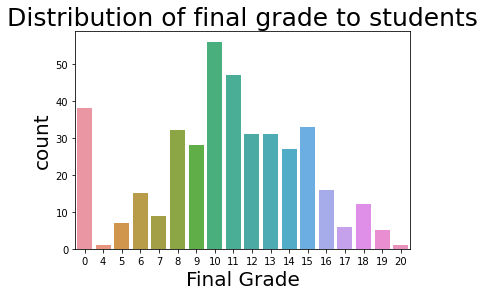

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt
b=sns.countplot(data['G3']) 
b.axes.set_title("Distribution of final grade to students",fontsize =25) 
b.set_xlabel("Final Grade",fontsize=20) 
b.set_ylabel("count",fontsize=20) 
plt.show()

In [10]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [11]:
data.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [12]:
data.shape

(395, 33)

In [13]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [14]:
male_studs=len(data[data['sex']=='M'])
female_studs=len(data[data['sex']=='F'])
print('Number of male students:',male_studs)
print('Number of female students:',female_studs)

Number of male students: 187
Number of female students: 208


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of students in different age groups')

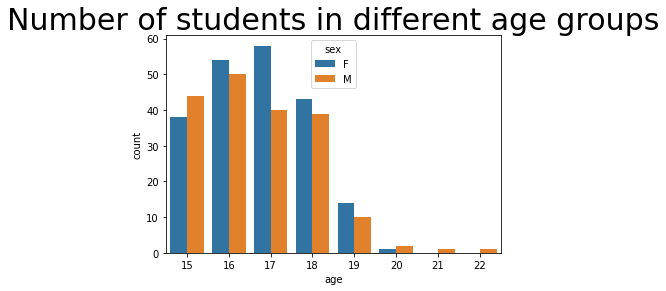

In [15]:
b=sns.countplot('age',hue='sex',data=data)
b.axes.set_title('Number of students in different age groups',fontsize=30)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


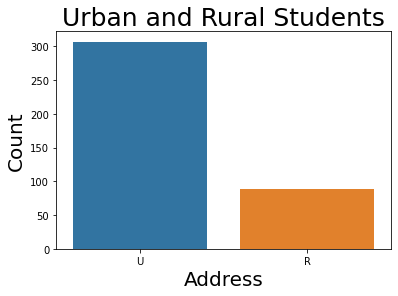

In [17]:
b=sns.countplot(data['address'])
b.axes.set_title("Urban and Rural Students",fontsize=25)
b.set_xlabel('Address',fontsize=20)
b.set_ylabel('Count',fontsize=20)
plt.show()

In [18]:
data.corr()["G3"].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [20]:
data['GradeAvg']=(data['G1']+data['G2']+data['G3'])/3

In [22]:
def find_grade(data):
  grades=[]
  for row in data['GradeAvg']:
      if row>=(0.9*data['GradeAvg'].max()):
        grades.append('1')
      elif row>=(0.7*data['GradeAvg'].max()):
        grades.append('2')
      elif row <(0.7*data['GradeAvg'].max()):
        grades.append('3')
  data['GradeAvg']=grades
  return data

In [23]:
data_dum=find_grade(data)

In [24]:
data_dum.drop(["school","age"],axis=1,inplace=True)

In [25]:
data_dum.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg
0,F,U,GT3,A,4,4,at_home,teacher,course,mother,...,3,4,1,1,3,6,5,6,6,3
1,F,U,GT3,T,1,1,at_home,other,course,father,...,3,3,1,1,3,4,5,5,6,3
2,F,U,LE3,T,1,1,at_home,other,other,mother,...,3,2,2,3,3,10,7,8,10,3
3,F,U,GT3,T,4,2,health,services,home,mother,...,2,2,1,1,5,2,15,14,15,2
4,F,U,GT3,T,3,3,other,other,home,father,...,3,2,1,2,5,4,6,10,10,3


In [26]:
data_dum.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'GradeAvg'],
      dtype='object')

In [28]:
categorical_d={"yes":1,"no":0}
data_dum['schoolsup'] = data_dum['schoolsup'].map(categorical_d)
data_dum['famsup'] = data_dum['famsup'].map(categorical_d)
data_dum['paid'] = data_dum['paid'].map(categorical_d)
data_dum['activities'] = data_dum['activities'].map(categorical_d)
data_dum['nursery'] = data_dum['nursery'].map(categorical_d)
data_dum['higher'] = data_dum['higher'].map(categorical_d)
data_dum['internet'] = data_dum['internet'].map(categorical_d)
data_dum['romantic'] = data_dum['romantic'].map(categorical_d)

In [29]:
categorical_d = {'F': 1, 'M': 0}
data_dum['sex'] = data_dum['sex'].map(categorical_d)

categorical_d = {'U': 1, 'R': 0}
data_dum['address'] = data_dum['address'].map(categorical_d)

categorical_d = {'LE3': 1, 'GT3': 0}
data_dum['famsize'] = data_dum['famsize'].map(categorical_d)

categorical_d= {'T': 1, 'A': 0}
data_dum['Pstatus'] = data_dum['Pstatus'].map(categorical_d)

categorical_d = {'teacher': 0, 'health': 1, 'services': 2,'at_home': 3,'other': 4}
data_dum['Mjob'] = data_dum['Mjob'].map(categorical_d)
data_dum['Fjob'] = data_dum['Fjob'].map(categorical_d)

categorical_d= {'home': 0, 'reputation': 1, 'course': 2,'other': 3}
data_dum['reason'] = data_dum['reason'].map(categorical_d)

categorical_d = {'mother': 0, 'father': 1, 'other': 2}
data_dum['guardian'] = data_dum['guardian'].map(categorical_d)

In [30]:
data_dum.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'GradeAvg'],
      dtype='object')

In [32]:
from sklearn.model_selection import train_test_split
x=data_dum.drop("G3",axis=1)
y=data_dum["G3"]

In [33]:
data_dum["G3"]

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [34]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
L=LinearRegression()

In [37]:
L.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred=L.predict(X_test)

In [39]:
print(L.score(X_test,y_test))

0.7784877387043513
